# Read Data

In [1]:
import pandas as pd
import sklearn
import numpy as n
import matplotlib.pyplot as plt

In [9]:
df_cleaned_salesdata = pd.read_csv("cleaned_salesdata.csv", index_col=0)

In [10]:
new_column_names = [
    "row_id",
    "order_id",
    "ship_mode",
    "customer_id",
    "customer_name",
    "segment",
    "country",
    "city",
    "state",
    "postal_code",
    "region",
    "product_id",
    "category",
    "sub_category",
    "product_name",
    "sales",
    "quantity",
    "discount",
    "profit",
    "order_year",
    "order_month",
    "order_day",
    "ship_year",
    "ship_month",
    "ship_day"
]

In [11]:
df_cleaned_salesdata.columns = new_column_names
df_cleaned_salesdata.columns

Index(['row_id', 'order_id', 'ship_mode', 'customer_id', 'customer_name',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'order_year', 'order_month',
       'order_day', 'ship_year', 'ship_month', 'ship_day'],
      dtype='object')

# Data Cleaning

In [12]:
# Remove 
rows_before = len(df_cleaned_salesdata)
df = df_cleaned_salesdata.dropna()
print(f"Rows before: {rows_before}. Rows removed {rows_before - len(df)}. Rows after: {len(df)}.")

Rows before: 9994. Rows removed 0. Rows after: 9994.


In [13]:
# row_id (int)
df['order_id'] = df['order_id'].astype(str)
df['ship_mode'] = df['ship_mode'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df['customer_name'] = df['customer_name'].astype(str)
df['segment'] = df['segment'].astype(str)
df['country'] = df['country'].astype(str)
df['city'] = df['city'].astype(str)
df['state'] = df['state'].astype(str)
# postal_code (int)
df['region'] = df['region'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['category'] = df['category'].astype(str)
df['sub_category'] = df['sub_category'].astype(str)
df['product_name'] = df['product_name'].astype(str)
# sales (float)
df['quantity'] = df['quantity'].astype(int)
# discount (float)
# profit (float)
# order_year (int)
# order_month (int)
# order_day (int)
# ship_year (int)
# ship_month (int)
# ship_day (int)

print(df.dtypes)

row_id             int64
order_id          object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
order_year         int64
order_month        int64
order_day          int64
ship_year          int64
ship_month         int64
ship_day           int64
dtype: object


# Date preparation

In [14]:
## Order Date
df['order_date'] = pd.to_datetime(
    df['order_year'].astype(str) + '-' +
    df['order_month'].astype(str) + '-' +
    df['order_day'].astype(str)
)

# Additional date data
df['order_weekday_intex'] = df['order_date'].dt.weekday
df['order_weekday'] = df['order_date'].dt.day_name()
df['order_week_of_year'] = df['order_date'].dt.isocalendar().week
df['order_is_weekend'] = df['order_weekday_intex'] >= 5
df = df.drop(columns=['order_weekday_intex'])

In [15]:
## Ship Date
df['ship_date'] = pd.to_datetime(
    df['ship_year'].astype(str) + '-' +
    df['ship_month'].astype(str) + '-' +
    df['ship_day'].astype(str)
)

df['time_to_deliver'] = (df['ship_date'] - df['order_date']).dt.total_seconds() / 3600

In [16]:
df_mean = (
    df
    .groupby(["order_year", "ship_mode"])["time_to_deliver"]
    .mean()
    .reset_index()
)
pivot = df_mean.pivot(
    index="order_year",
    columns="ship_mode",
    values="time_to_deliver"
)

Anzahl pro Jahr und Ship Mode:

ship_mode   Same Day  First Class  Second Class  Standard Class
order_year                                                     
2014              90          291           381            1231
2015             109          288           417            1288
2016             158          387           490            1552
2017             186          572           657            1897

----------------------------------------



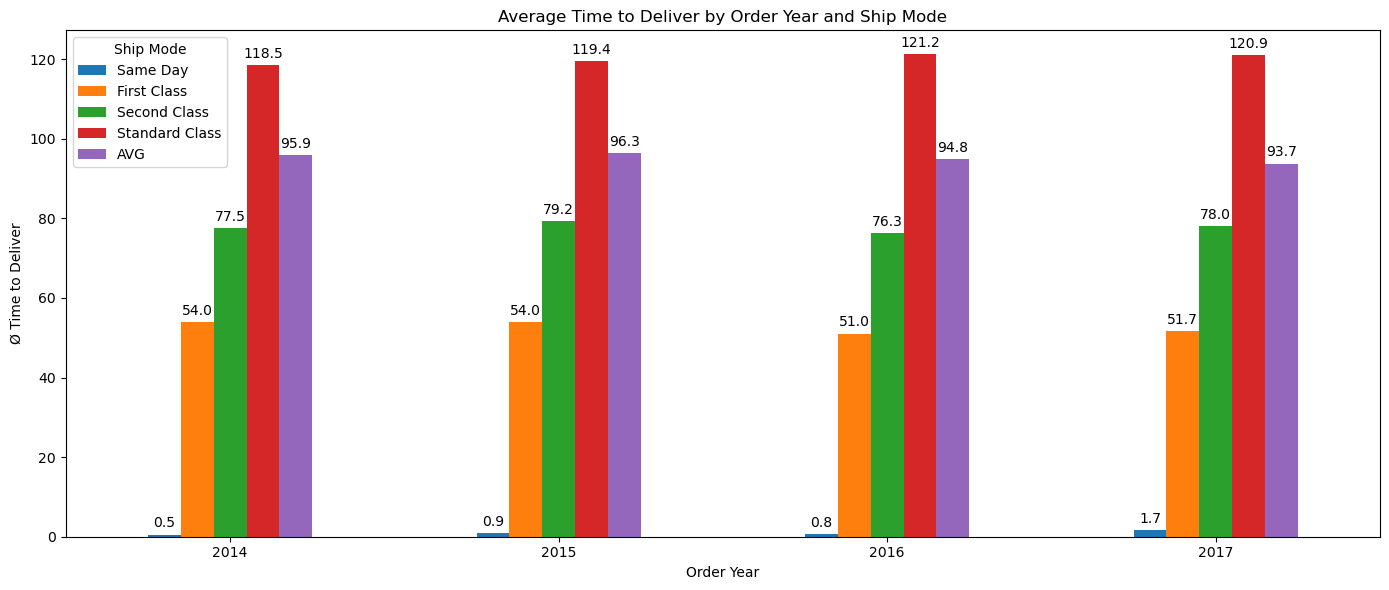

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# gewünschte Reihenfolge der Ship Modes
# -------------------------------------------------
order = [
    "Same Day",
    "First Class",
    "Second Class",
    "Standard Class"
]

# -------------------------------------------------
# 1) Häufigkeit der ship_mode NACH JAHR ausgeben
# -------------------------------------------------
print("Anzahl pro Jahr und Ship Mode:\n")

count_table = (
    df
    .groupby(["order_year", "ship_mode"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=order)
)

print(count_table)
print("\n" + "-"*40 + "\n")

# -------------------------------------------------
# 2) Mittelwert pro Jahr & ship_mode
# -------------------------------------------------
df_mean = (
    df
    .groupby(["order_year", "ship_mode"])["time_to_deliver"]
    .mean()
    .reset_index()
)

# -------------------------------------------------
# 3) Pivot + Reihenfolge
# -------------------------------------------------
pivot = (
    df_mean
    .pivot(index="order_year", columns="ship_mode", values="time_to_deliver")
    .reindex(columns=order)
)

# -------------------------------------------------
# 4) KORREKTER AVG:
#    über ALLE Bestellungen eines Jahres
# -------------------------------------------------
year_avg = (
    df
    .groupby("order_year")["time_to_deliver"]
    .mean()
)

pivot["AVG"] = year_avg

# -------------------------------------------------
# 5) Plot
# -------------------------------------------------
ax = pivot.plot(
    kind="bar",
    figsize=(14, 6)
)

ax.set_xlabel("Order Year")
ax.set_ylabel("Ø Time to Deliver")
ax.set_title("Average Time to Deliver by Order Year and Ship Mode")
ax.legend(title="Ship Mode")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# -------------------------------------------------
# 6) Werte über Balken schreiben
# -------------------------------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f",
        padding=3
    )

plt.tight_layout()
plt.show()


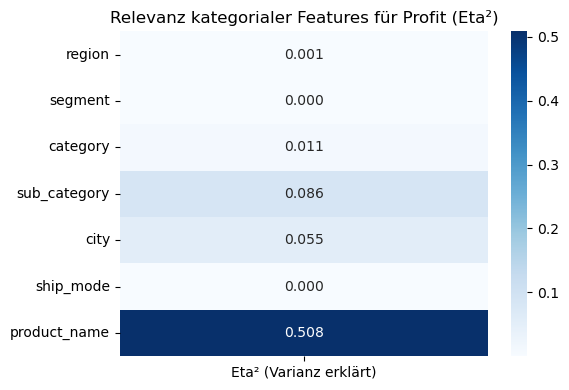

{'region': np.float64(0.0007869112604017114), 'segment': np.float64(0.00017974285080725967), 'category': np.float64(0.010755060495527009), 'sub_category': np.float64(0.0861988804521971), 'city': np.float64(0.05505624571830948), 'ship_mode': np.float64(4.62189325385334e-05), 'product_name': np.float64(0.50842405264816)}


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Funktion zur Berechnung von Eta-Quadrat
def eta_squared(df, categorical_col, target_col):
    groups = [
        df[target_col].values
        for name, group in df.groupby(categorical_col)
    ]
    f_stat, p_val = stats.f_oneway(*groups)

    grand_mean = df[target_col].mean()
    ss_between = sum(
        len(group) * (group.mean() - grand_mean) ** 2
        for name, group in df.groupby(categorical_col)
        for group in [group[target_col]]
    )
    ss_total = sum((df[target_col] - grand_mean) ** 2)

    return ss_between / ss_total


# Features testen
categorical_features = [
    "region",
    "segment",
    "category",
    "sub_category",
    "city",
    "ship_mode",
    "product_name"
]

eta_results = {
    feature: eta_squared(df, feature, "profit")
    for feature in categorical_features
}

# DataFrame für Heatmap
eta_df = pd.DataFrame.from_dict(
    eta_results,
    orient="index",
    columns=["Eta² (Varianz erklärt)"]
)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(
    eta_df,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    cbar=True
)
plt.title("Relevanz kategorialer Features für Profit (Eta²)")
plt.tight_layout()
plt.show()

print(eta_results)

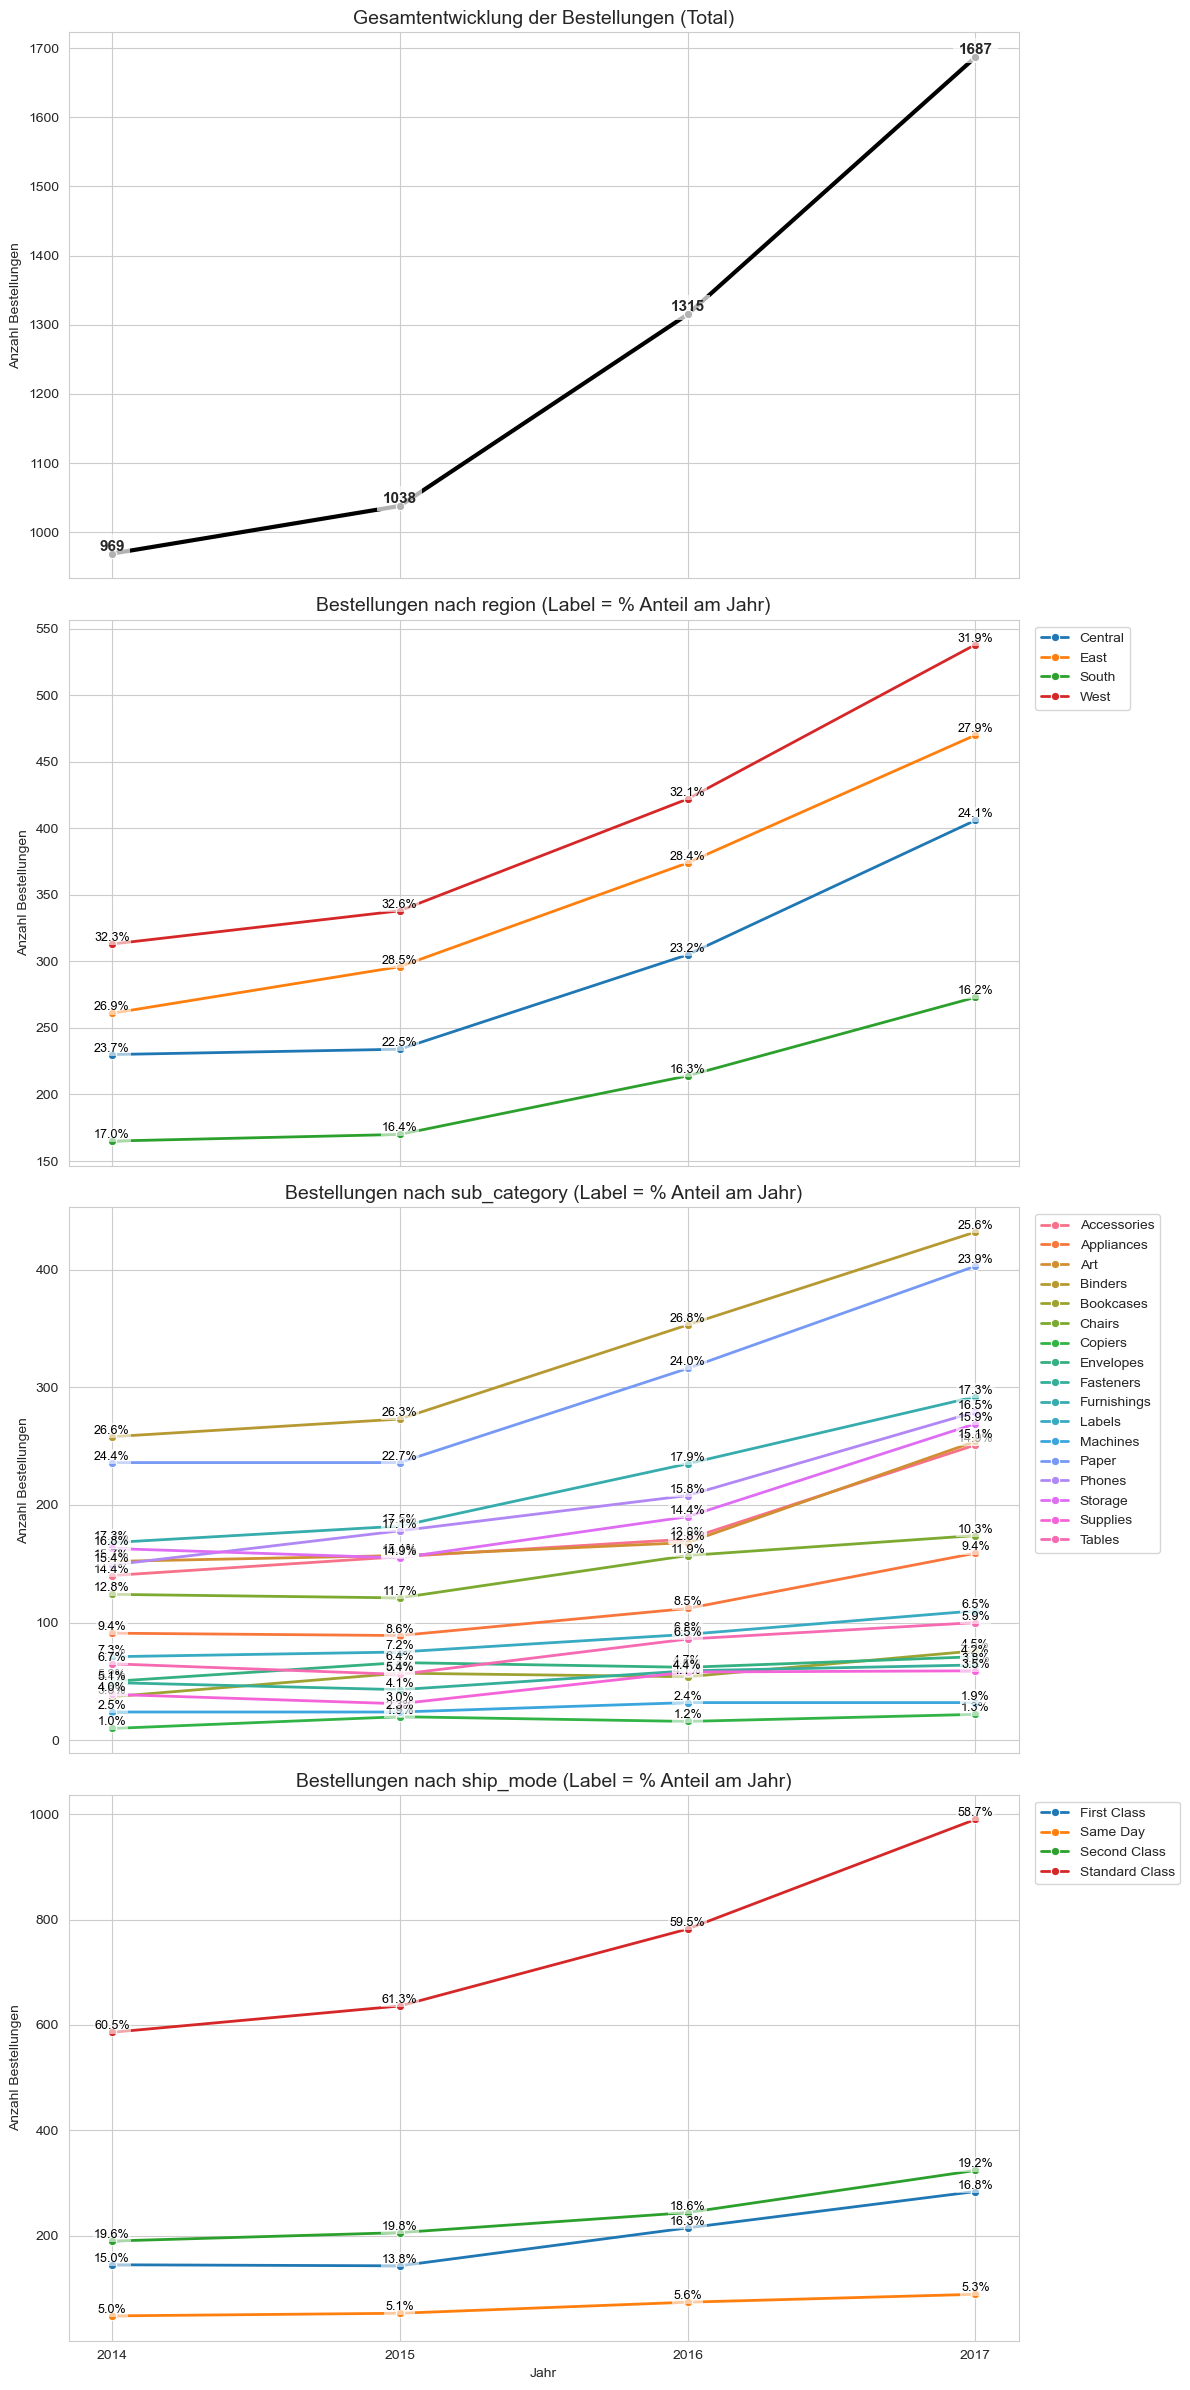

In [29]:
# ---------------------------------------------------------
# TEIL 2: Vorberechnungen
# ---------------------------------------------------------
# Berechne die Gesamtanzahl Unique Orders pro Jahr (für den Nenner der Prozentrechnung)
yearly_totals = df.groupby('order_year')['order_id'].nunique()


# ---------------------------------------------------------
# TEIL 3: Plotting
# ---------------------------------------------------------
sns.set_style("whitegrid")

# Erstelle 4 untereinanderliegende Diagramme
fig, axes = plt.subplots(4, 1, figsize=(12, 24), sharex=True)
dimensions = ['Gesamt', 'region', 'sub_category', 'ship_mode']

for i, dim in enumerate(dimensions):
    ax = axes[i]
    
    if dim == 'Gesamt':
        # --- 1. Gesamtanzahl ---
        grouped = df.groupby('order_year')['order_id'].nunique().reset_index()
        
        sns.lineplot(data=grouped, x='order_year', y='order_id', 
                     marker='o', color='black', linewidth=3, ax=ax)
        
        ax.set_title("Gesamtentwicklung der Bestellungen (Total)", fontsize=14)
        ax.set_ylabel("Anzahl Bestellungen")
        
        # Beschriftung: Absolute Zahlen
        for _, row in grouped.iterrows():
            ax.text(row['order_year'], row['order_id'], 
                    f"{int(row['order_id'])}", 
                    ha='center', va='bottom', fontweight='bold', fontsize=11, 
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
            
    else:
        # --- 2., 3., 4. Kategorien ---
        # Gruppieren nach Jahr und Kategorie
        grouped = df.groupby(['order_year', dim])['order_id'].nunique().reset_index()
        
        # Mit Jahressummen mergen, um % zu berechnen
        grouped = grouped.merge(yearly_totals.rename('total_year'), on='order_year')
        grouped['percentage'] = (grouped['order_id'] / grouped['total_year']) * 100
        
        # Plotten (Y-Achse bleibt absolute Anzahl, damit man das Wachstum sieht)
        sns.lineplot(data=grouped, x='order_year', y='order_id', hue=dim, 
                     marker='o', linewidth=2, ax=ax)
        
        ax.set_title(f"Bestellungen nach {dim} (Label = % Anteil am Jahr)", fontsize=14)
        ax.set_ylabel("Anzahl Bestellungen")
        
        # Beschriftung: Prozentwerte an die Punkte schreiben
        for _, row in grouped.iterrows():
            # Nur beschriften, wenn Daten vorhanden (NaN safety)
            if pd.notnull(row['percentage']):
                ax.text(row['order_year'], row['order_id'], 
                        f"{row['percentage']:.1f}%", 
                        ha='center', va='bottom', fontsize=9, color='black',
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))
        
        # Legende nach außen schieben
        ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

# X-Achse nur ganze Jahre anzeigen
plt.xticks(sorted(df['order_year'].unique()))
plt.xlabel("Jahr")

plt.tight_layout()
plt.show()

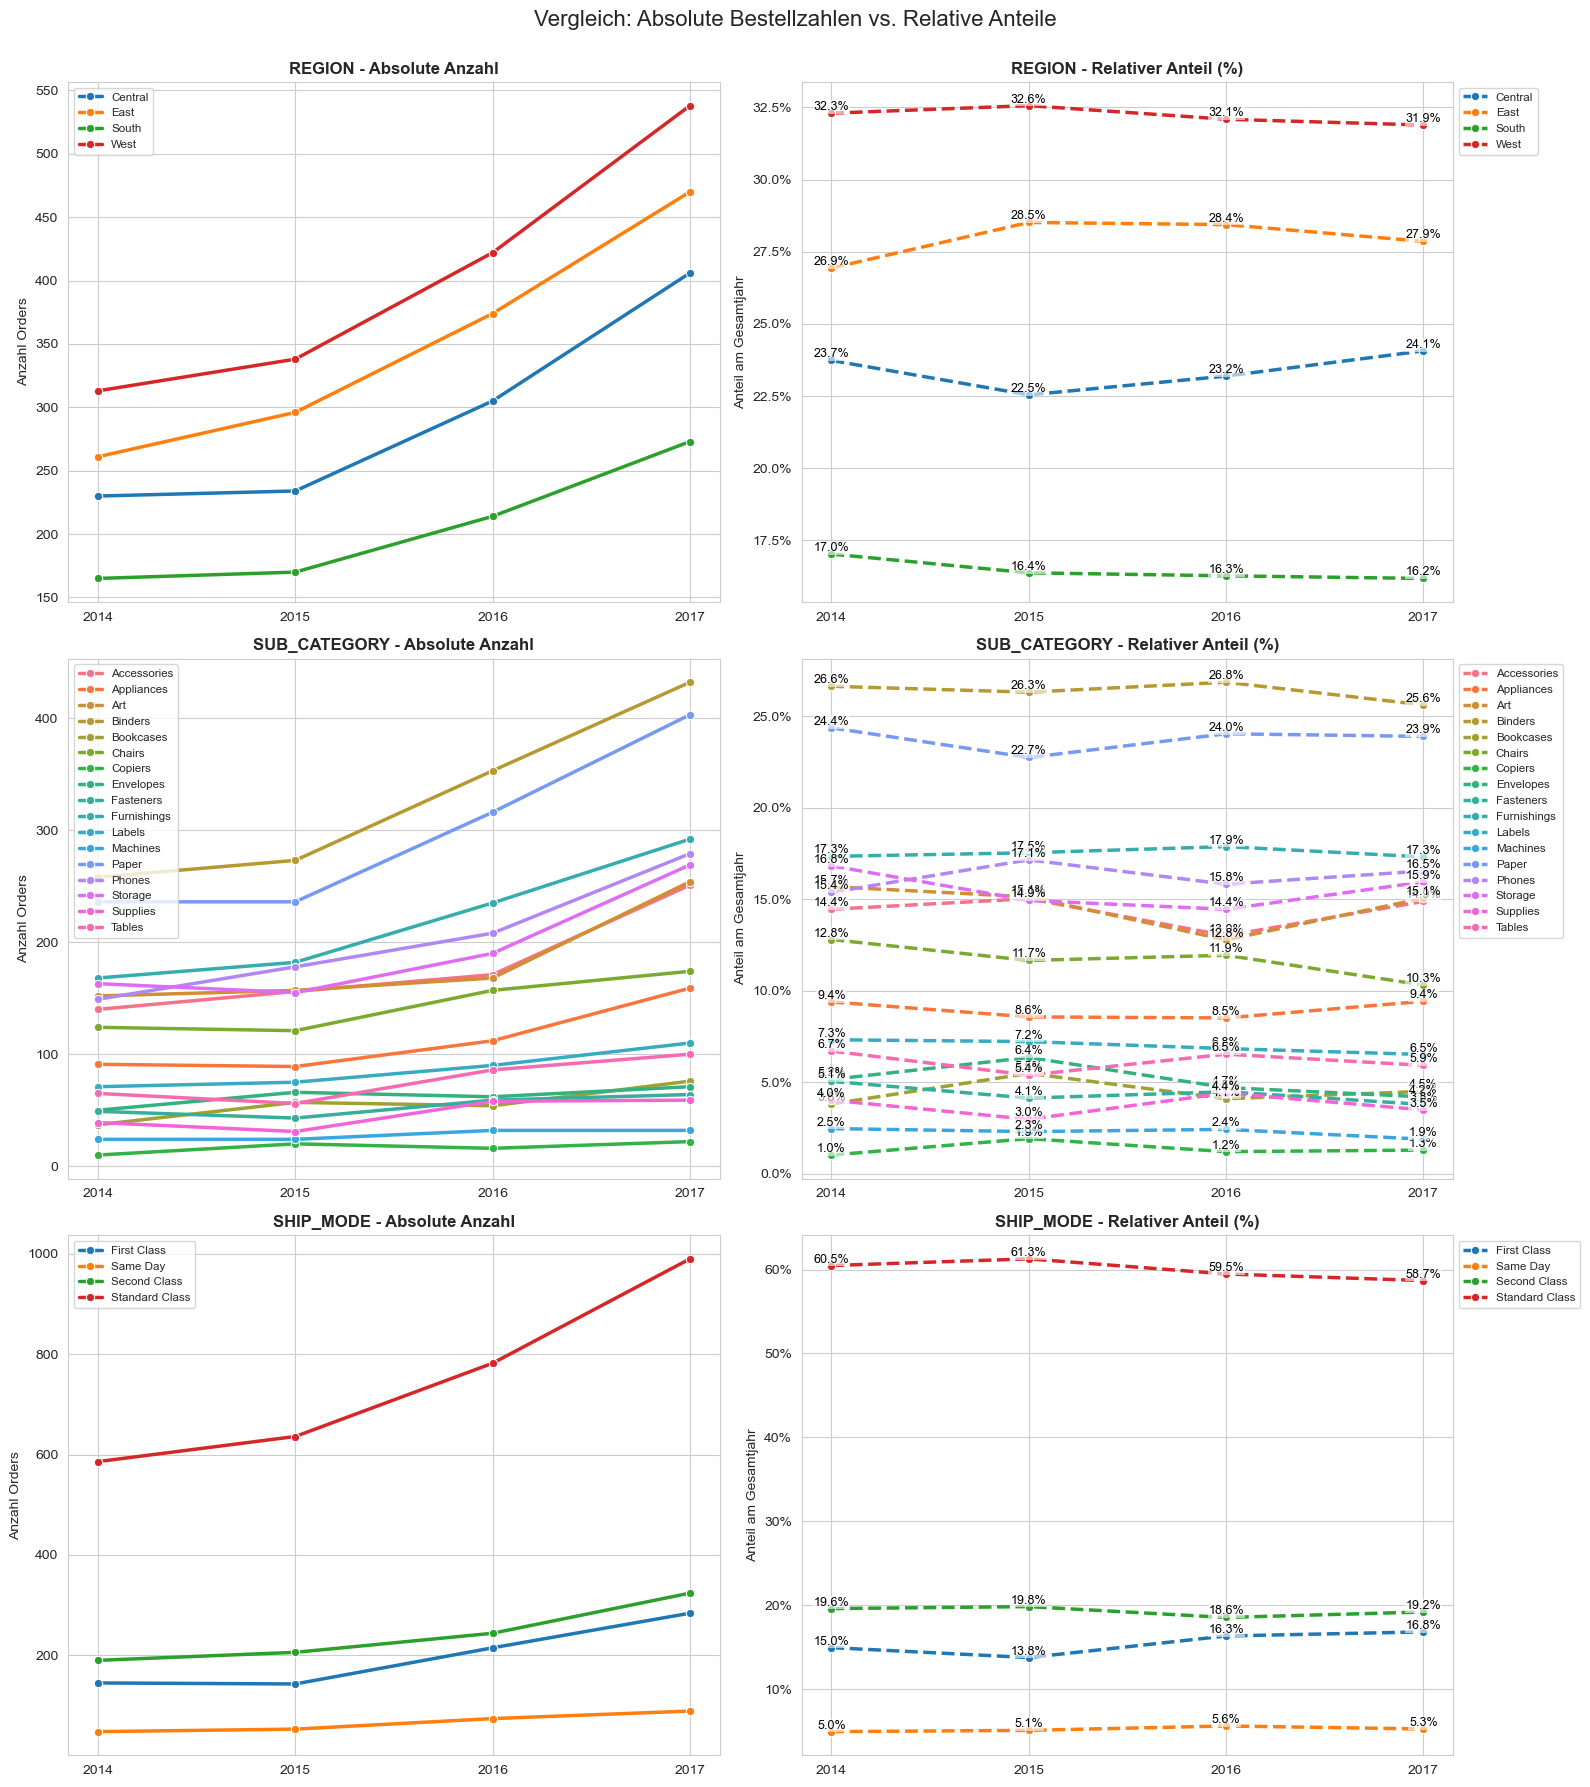

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# ---------------------------------------------------------
# TEIL 2: Vorbereitung & Globale Variablen
# ---------------------------------------------------------

# FIX: Wir holen uns die Jahre direkt aus deinen Daten, damit 'years' definiert ist
years = sorted(df['order_year'].unique())

# Berechne Gesamtbestellungen pro Jahr für die %-Berechnung (Nenner)
yearly_totals = df.groupby('order_year')['order_id'].nunique()

# Definition der Kategorien, die geplottet werden sollen
categories_to_plot = ['region', 'sub_category', 'ship_mode']

# ---------------------------------------------------------
# TEIL 3: Plotting
# ---------------------------------------------------------
sns.set_style("whitegrid")

# Grid erstellen: Zeilen = Anzahl Kategorien, Spalten = 2 (Absolut vs. Relativ)
fig, axes = plt.subplots(nrows=len(categories_to_plot), ncols=2, figsize=(16, 6 * len(categories_to_plot)))

# Titel für das gesamte Dashboard
fig.suptitle('Vergleich: Absolute Bestellzahlen vs. Relative Anteile', fontsize=16, y=0.99)

for i, cat in enumerate(categories_to_plot):
    
    # --- Daten aggregieren ---
    # 1. Zähle unique Order-IDs pro Jahr und Kategorie
    grouped = df.groupby(['order_year', cat])['order_id'].nunique().reset_index()
    
    # 2. Merge mit Jahressummen für Prozentrechnung
    grouped = grouped.merge(yearly_totals.rename('total_year'), on='order_year')
    grouped['percentage'] = (grouped['order_id'] / grouped['total_year']) * 100
    
    # --- PLOT LINKS: ABSOLUTE ZAHLEN ---
    ax_abs = axes[i, 0]
    sns.lineplot(data=grouped, x='order_year', y='order_id', hue=cat, 
                 marker='o', linewidth=2.5, ax=ax_abs)
    
    ax_abs.set_title(f'{cat.upper()} - Absolute Anzahl', fontweight='bold')
    ax_abs.set_ylabel('Anzahl Orders')
    ax_abs.set_xlabel('')
    ax_abs.set_xticks(years)  # Nutzt jetzt die dynamische Variable
    
    # Legende nach außen schieben (links oben)
    ax_abs.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize='small')

    # --- PLOT RECHTS: RELATIVE ZAHLEN (%) ---
    ax_rel = axes[i, 1]
    sns.lineplot(data=grouped, x='order_year', y='percentage', hue=cat, 
                 marker='o', linewidth=2.5, linestyle='--', ax=ax_rel)
    
    ax_rel.set_title(f'{cat.upper()} - Relativer Anteil (%)', fontweight='bold')
    ax_rel.set_ylabel('Anteil am Gesamtjahr')
    ax_rel.set_xlabel('')
    ax_rel.set_xticks(years)
    
    # Y-Achse als Prozent formatieren (z.B. "20%")
    ax_rel.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Legende nach außen schieben (rechts oben)
    ax_rel.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

    # Werte im relativen Plot anschreiben
    for _, row in grouped.iterrows():
        # Nur labeln, wenn Daten vorhanden sind
        if pd.notnull(row['percentage']):
            ax_rel.text(row['order_year'], row['percentage'], 
                        f"{row['percentage']:.1f}%", 
                        fontsize=9, ha='center', va='bottom', color='black', 
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.5))

# Layout optimieren
plt.tight_layout()
plt.subplots_adjust(top=0.95) # Platz für den Haupttitel lassen
plt.show()

# Boxplots

In [76]:
def gen_plot(
        df_values, 
        df_devide_values=None, 
        title="Test", 
        xlabel="Test", 
        ylabel="Test", 
        figsize=(10, 8)
        ):
    
    if df_devide_values is not None:
        values = df_values / df_devide_values
    else:
        values = df_values

    plt.figure(figsize=figsize)

    sns.heatmap(values, 
                annot=True, 
                fmt=".2f",       
                cmap="RdYlGn",   
                center=0,       
                linewidths=.5,
                cbar_kws={'label': 'Durchschnittsgewinn pro Stück'})

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tick_params(axis='both', labeltop=True, labelbottom=False)

    plt.tight_layout()
    plt.show()

print("Plot function generated.")

Plot function generated.


In [106]:
## SUB CATEGORY / REGION
df_profit_sum_sub_category_region = df.pivot_table(index='sub_category', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_region = df.pivot_table(index='sub_category', columns='region', values='quantity', aggfunc='sum')
## CATEGORY / REGION
df_profit_sum_category_region = df.pivot_table(index='category', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_category_region = df.pivot_table(index='category', columns='region', values='quantity', aggfunc='sum')
## REGION / SEGMENT
df_profit_sum_segment_region = df.pivot_table(index='segment', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_segment_region = df.pivot_table(index='segment', columns='region', values='quantity', aggfunc='sum')
## SUB CATEGORY / SEGMENT
df_profit_sum_sub_category_segment = df.pivot_table(index='sub_category', columns='segment', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_segment = df.pivot_table(index='sub_category', columns='segment', values='quantity', aggfunc='sum')
## DISCOUNT / SEGMENT
df_profit_sum_discount_segment = df.pivot_table(index='discount', columns='segment', values='profit', aggfunc='sum')
df_quantity_sum_discount_segment = df.pivot_table(index='discount', columns='segment', values='quantity', aggfunc='sum')

print("Necessary pivot tables generated.")

Necessary pivot tables generated.


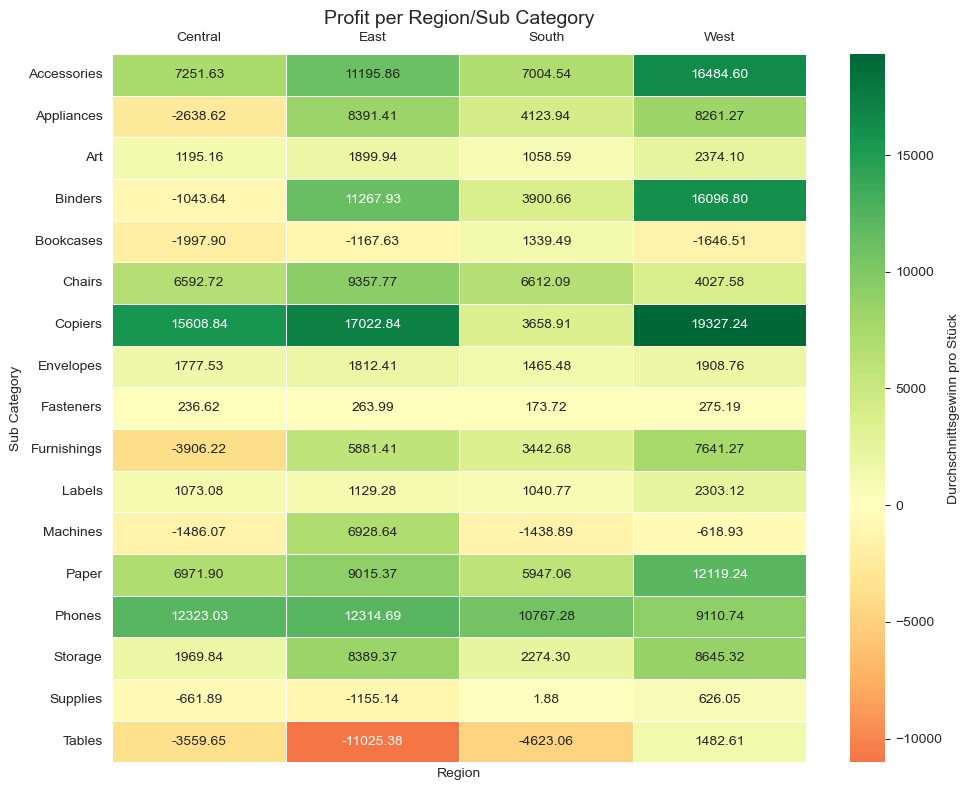

In [82]:
gen_plot(df_profit_sum_sub_category_region, None, "Profit per Region/Sub Category", "Region", "Sub Category", (10, 8))

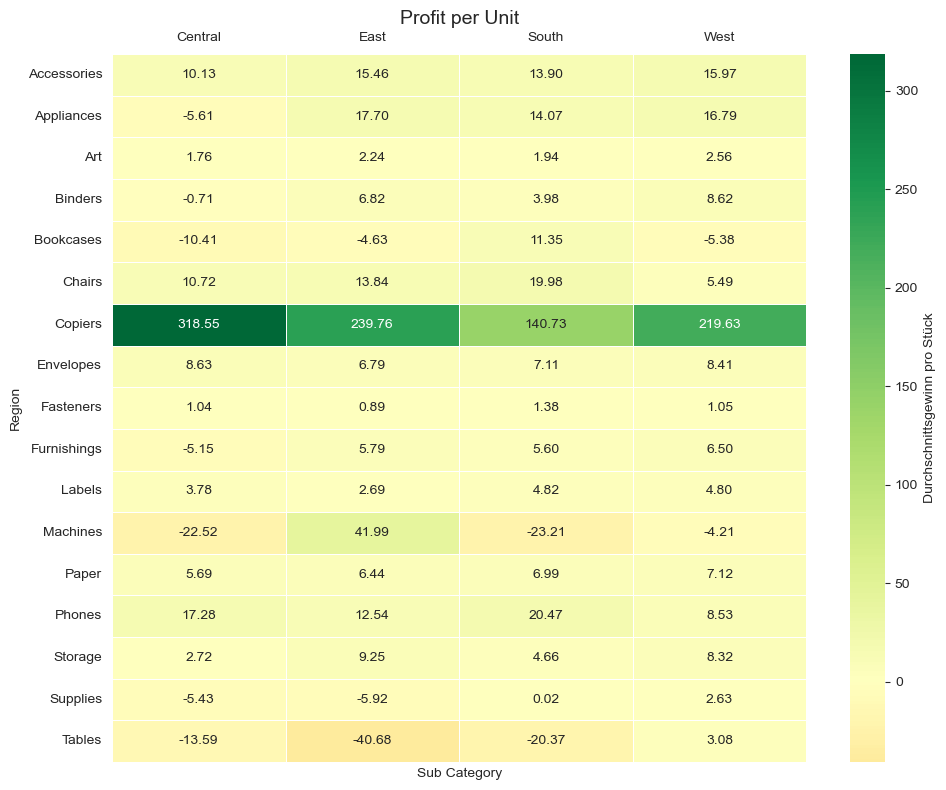

In [ ]:
gen_plot(df_profit_sum_sub_category_region, df_quantity_sum_sub_category_region, "Profit per Unit", "Region", "Sub Category", (10, 8))

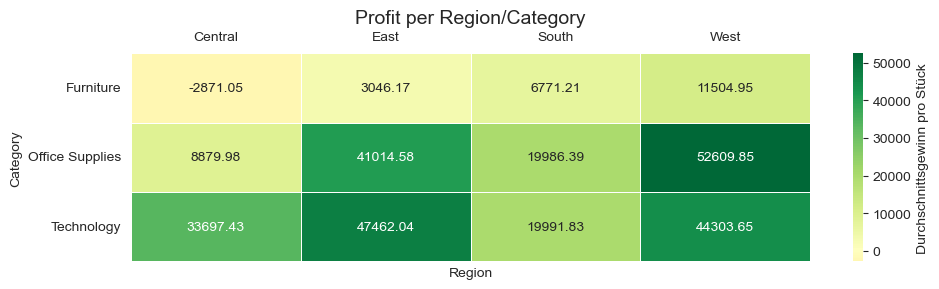

In [90]:
gen_plot(df_profit_sum_category_region, None, "Profit per Region/Category", "Region", "Category", (10, 3))

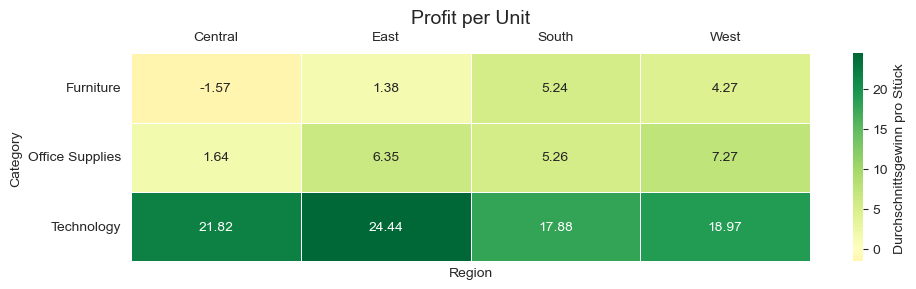

In [93]:
gen_plot(df_profit_sum_category_region, df_quantity_sum_category_region, "Profit per Unit", "Region", "Category", (10, 3))

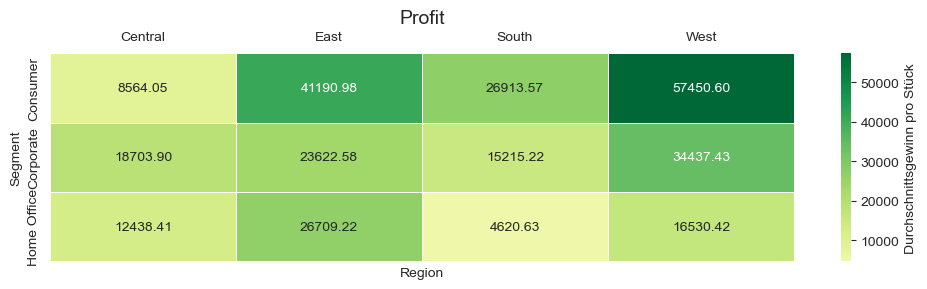

In [99]:
gen_plot(df_profit_sum_segment_region, None, "Profit", "Region", "Segment", (10, 3))

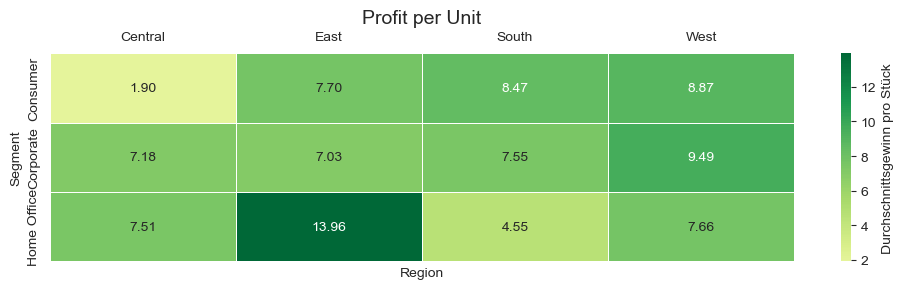

In [98]:
gen_plot(df_profit_sum_segment_region, df_quantity_sum_segment_region, "Profit per Unit", "Region", "Segment", (10, 3))

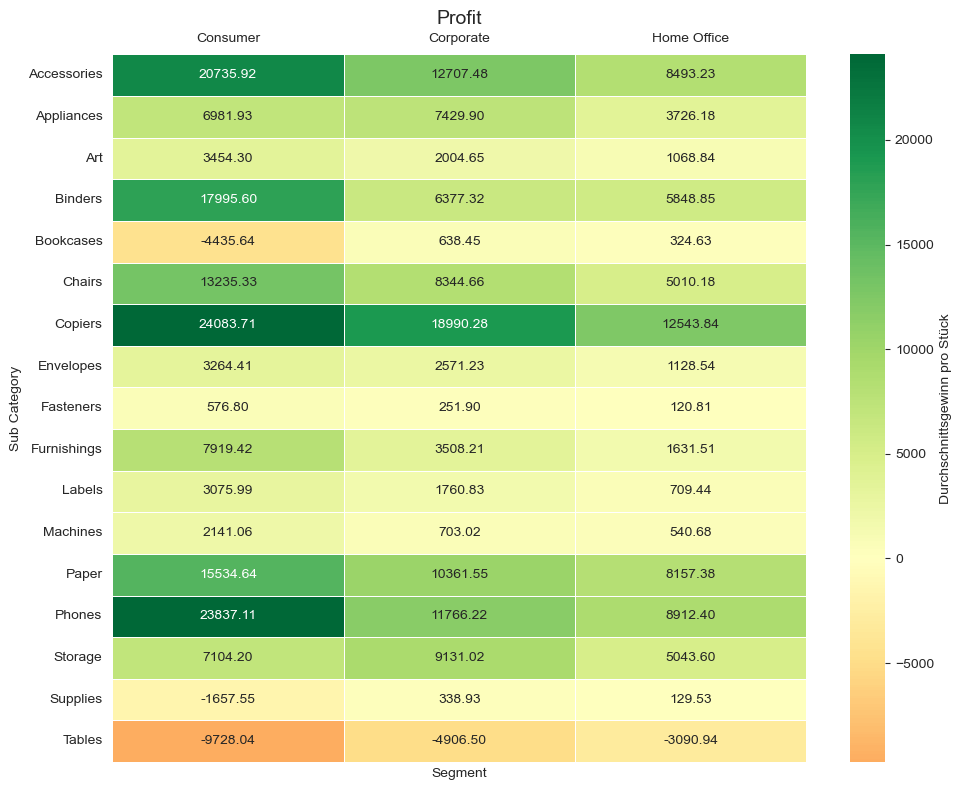

In [103]:
gen_plot(df_profit_sum_sub_category_segment, None, "Profit", "Segment", "Sub Category", (10, 8))

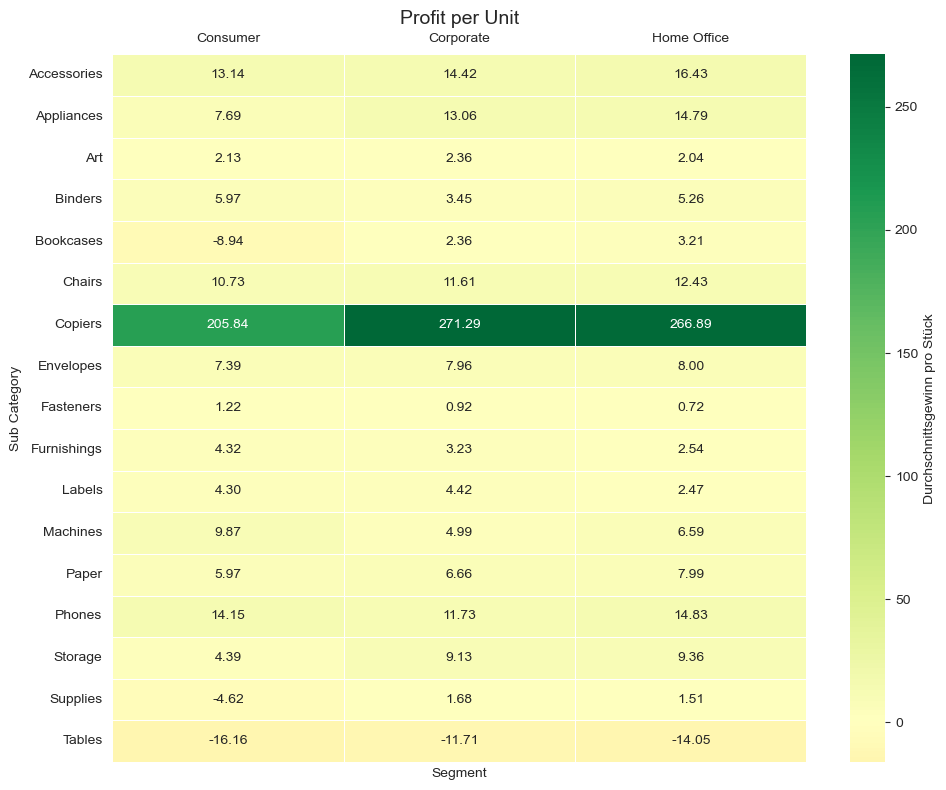

In [105]:
gen_plot(df_profit_sum_sub_category_segment, df_quantity_sum_sub_category_segment, "Profit per Unit", "Segment", "Sub Category", (10, 8))

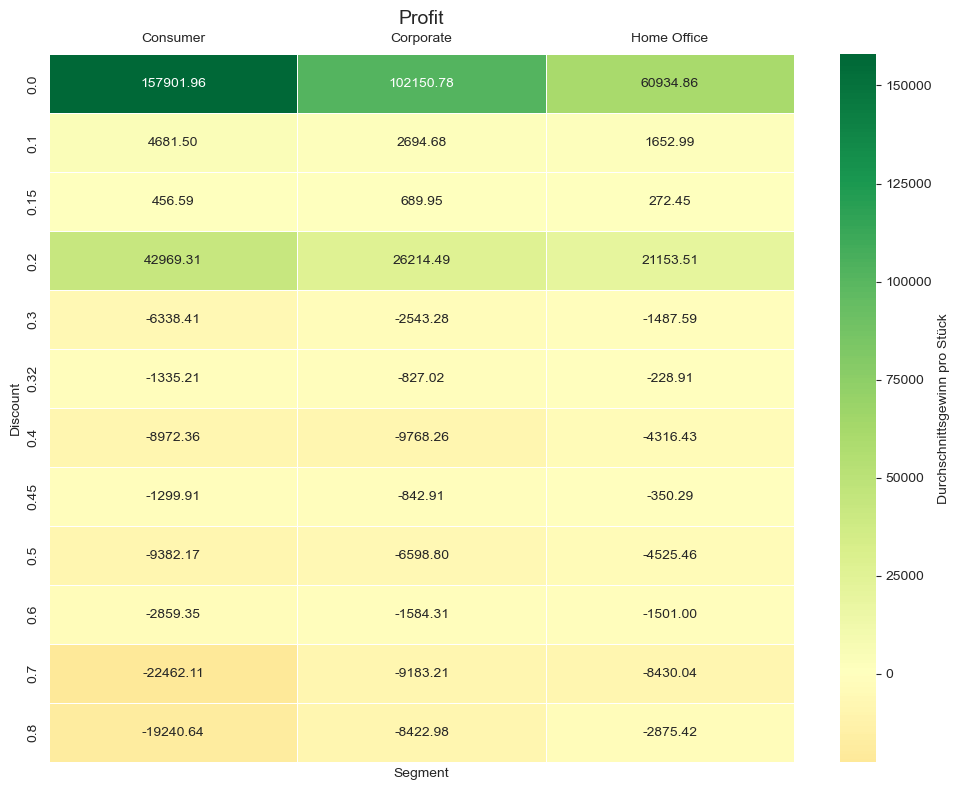

In [107]:
gen_plot(df_profit_sum_discount_segment, None, "Profit", "Segment", "Discount", (10, 8))

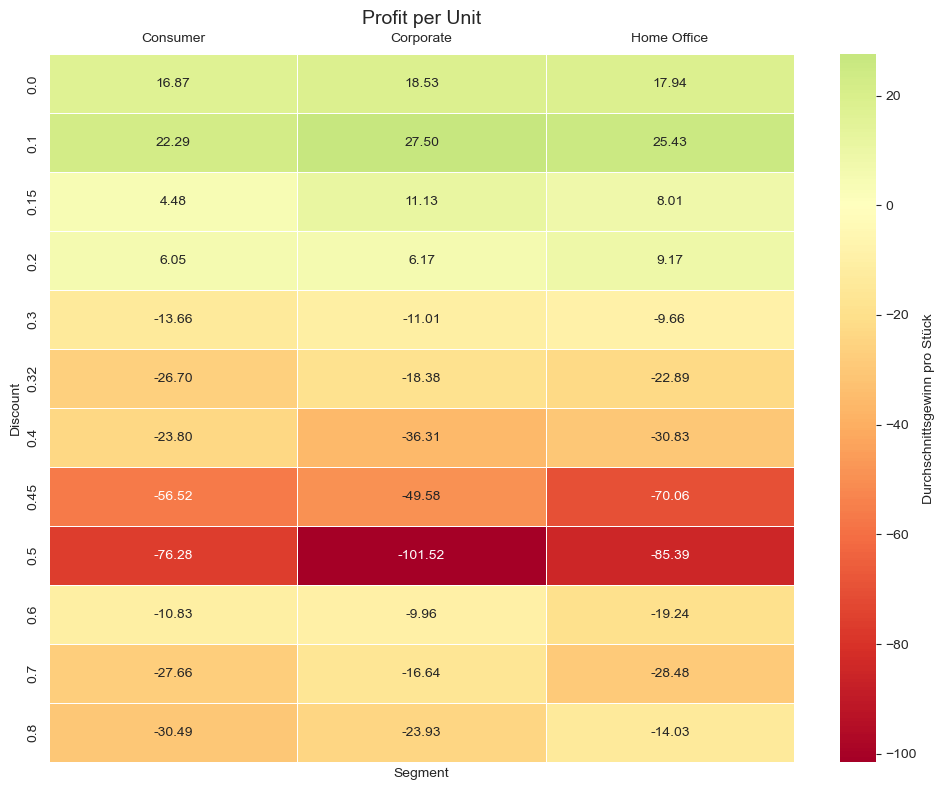

In [108]:
gen_plot(df_profit_sum_discount_segment, df_quantity_sum_discount_segment, "Profit per Unit", "Segment", "Discount", (10, 8))

## Ab hier noch nicht bearbeitet

In [28]:
df_test = df[df['order_id']=='CA-2014-115812']
df_test = df_test.drop(columns=[ 'customer_name', 'country', 'state', 'postal_code', 'order_year', 'order_month', 'order_day', 'ship_year', 'ship_month', 'ship_mode', 'city' ,'ship_day', 'segment', 'region', 'order_weekday', 'order_week_of_year', 'order_is_weekend', 'order_date', 'ship_date', 'time_to_deliver'])
df_test.head(10)

,row_id,order_id,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit
5,6,CA-2014-115812,BH-11710,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,BH-11710,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,BH-11710,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,BH-11710,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,BH-11710,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
10,11,CA-2014-115812,BH-11710,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092
11,12,CA-2014-115812,BH-11710,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568


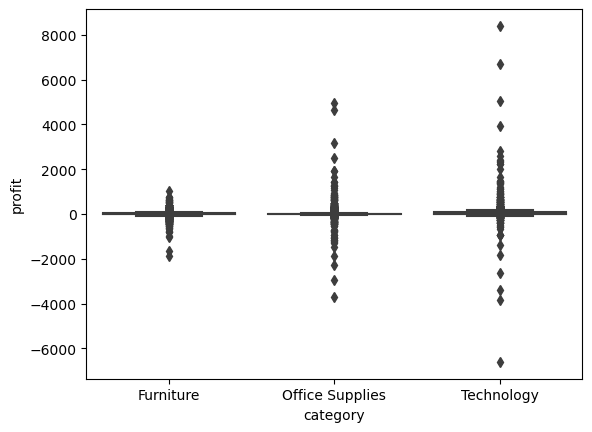

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Menge pro Kategorie
sns.boxplot(x='category', y='profit', data=df)
plt.show()


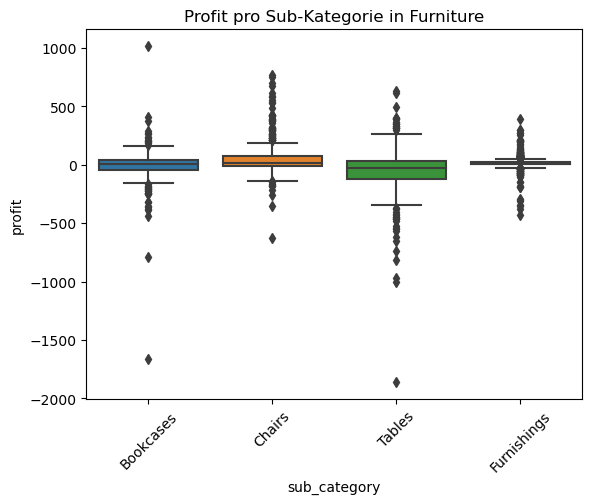

In [ ]:
sns.boxplot(x='sub_category', y='profit', data=df[df['category']=='Furniture'])
plt.title("Profit pro Sub-Kategorie in Furniture")
plt.xticks(rotation=45)  # Labels lesbar machen
plt.show()

## Erster ML Ansatz

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# 2. Spalten bereinigen (wie zuvor definiert)
new_column_names = [
    "row_id", "order_id", "ship_mode", "customer_id", "customer_name",
    "segment", "country", "city", "state", "postal_code", "region",
    "product_id", "category", "sub_category", "product_name",
    "sales", "quantity", "discount", "profit",
    "order_year", "order_month", "order_day",
    "ship_year", "ship_month", "ship_day"
]

# Prüfen ob Index-Spalte existiert und entfernen/umbenennen
if len(df.columns) == 26: 
    df = df.iloc[:, 1:] 
df.columns = new_column_names

df = df[df['ship_mode'].isin(['First Class','Second Class','Standard Class'])]
# 3. Features & Target definieren
# Diese Features basieren auf unserer vorherigen Analyse
features = [
    'sales', 'quantity', 'discount',      # Numerisch
    'category', 'sub_category', 'region', 'segment' # Kategorisch
]
target = 'profit'

X = df[features]
y = df[target]

# One-Hot Encoding für kategorische Variablen
X_encoded = pd.get_dummies(X, columns=['category', 'sub_category', 'region', 'segment'], drop_first=True)

# 4. Modelle definieren (Ihre Parameter)
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42,
    ),
}

# 5. Cross Validation durchführen
print(f"{'Model':<20} | {'R2 Score (Mean)':<15} | {'MAE (Mean USD)':<15}")
print("-" * 60)

for name, model in models.items():
    # R2 Score: Wie gut passt das Modell (1.0 ist perfekt)
    cv_r2 = cross_val_score(model, X_encoded, y, cv=5, scoring='r2')
    
    # MAE (Mean Absolute Error): Durchschnittlicher Fehler in USD
    # Wir nutzen 'neg_mean_absolute_error', da sklearn Scores maximieren will (daher sind Fehler negativ)
    cv_mae = cross_val_score(model, X_encoded, y, cv=5, scoring='neg_mean_absolute_error')
    
    print(f"{name:<20} | {cv_r2.mean():<15.4f} | {-cv_mae.mean():<15.2f}")

Model                | R2 Score (Mean) | MAE (Mean USD) 
------------------------------------------------------------
LinearRegression     | 0.2143          | 59.94          
RandomForest         | 0.6332          | 19.33          
GradientBoosting     | 0.7037          | 27.43          


In [ ]:
print(f"Years in which orders were placed: {df['order_year'].unique()}.")
print(f"Years in which deliveries were made: {df['ship_year'].unique()}.")

Years in which orders were placed: [2016 2015 2014 2017].
Years in which deliveries were made: [2016 2015 2014 2017 2018].


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Beispiel: Kategorie ↔ Region
table = pd.crosstab(df['product_name'], df['region'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2}, p-Wert: {p}")


Chi2: 5558.870251083685, p-Wert: 0.4526590809634631


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Menge pro Kategorie
sns.boxplot(x='category', y='region', data=df)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
df = df.drop(columns=['ship_year', 'ship_month', 'ship_day'])
df.columns

Index(['row_id', 'order_id', 'ship_mode', 'customer_id', 'customer_name',
       'segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'order_year', 'order_month',
       'order_day', 'order_date', 'order_weekday', 'order_week_of_year',
       'order_is_weekend'],
      dtype='object')

: 

# Data 